In [1]:
%pip install polars

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

In [ ]:
path1 = 'ga_hits.csv'
path2 = 'ga_sessions.csv'

In [4]:
#data_hits = pd.read_csv(path1)
pdata_hits = pl.read_csv(path1)

In [5]:
data_sessions = pd.read_csv(path2)

/tmp/ipykernel_36/3319174243.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sessions = pd.read_csv(path2)


#  Работа с датасетом действий

**Описание колонок в `ga_hits.csv`:**

- `session_id` — ID визита  
- `hit_date` — дата события  
- `hit_time` — время события  
- `hit_number` — порядковый номер события в рамках сессии  
- `hit_type` — тип события  
- `hit_referer` — источник события  
- `hit_page_path` — страница события  
- `event_category` — тип действия  
- `event_action` — действие  
- `event_label` — тег действия  
- `event_value` — значение результата действия


In [6]:
pdata_hits.head()

session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
str,str,f64,i64,str,str,str,str,str,str,str
"""5639623078712724064.1640254056…","""2021-12-23""",597864.0,30,"""event""",null,"""sberauto.com/cars?utm_source_i…","""quiz""","""quiz_show""",null,null
"""7750352294969115059.1640271109…","""2021-12-23""",597331.0,41,"""event""",null,"""sberauto.com/cars/fiat?city=1&…","""quiz""","""quiz_show""",null,null
"""885342191847998240.1640235807.…","""2021-12-23""",796252.0,49,"""event""",null,"""sberauto.com/cars/all/volkswag…","""quiz""","""quiz_show""",null,null
"""142526202120934167.1640211014.…","""2021-12-23""",934292.0,46,"""event""",null,"""sberauto.com/cars?utm_source_i…","""quiz""","""quiz_show""",null,null
"""3450086108837475701.1640265078…","""2021-12-23""",768741.0,79,"""event""",null,"""sberauto.com/cars/all/mercedes…","""quiz""","""quiz_show""",null,null


In [7]:
#data_hits.info()

In [8]:
#print(data_hits.shape)
pdata_hits = pdata_hits.unique()
#print(data_hits.shape)

In [9]:
missing_pct = pdata_hits.null_count()/pdata_hits.shape[0] * 100
print(missing_pct)

shape: (1, 11)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ session_i ┆ hit_date ┆ hit_time  ┆ hit_numbe ┆ … ┆ event_cat ┆ event_act ┆ event_lab ┆ event_val │
│ d         ┆ ---      ┆ ---       ┆ r         ┆   ┆ egory     ┆ ion       ┆ el        ┆ ue        │
│ ---       ┆ f64      ┆ f64       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ f64       ┆          ┆           ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0.0       ┆ 0.0      ┆ 58.247795 ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 23.909905 ┆ 100.0     │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


#### Удалим столбцы, где процент больше 50 и заменим пропуски "n/a" в остальных случаях

In [10]:
col_for_remove = []
for col in missing_pct.columns:
    if missing_pct[col].item() > 50:
        col_for_remove.append(col)

pdata_hits = pdata_hits.drop(col_for_remove)
pdata_hits = pdata_hits.fill_null("n/a")

In [11]:
pdata_hits.null_count()/pdata_hits.shape[0] * 100


session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Рассмотрим количество классов и действий по ним

In [12]:
event_action = pdata_hits["event_action"].value_counts().sort('count',descending=True)

#### топ 10 самых популярных действий:

In [13]:
event_action[:10]

event_action,count
str,u32
"""view_card""",3558985
"""view_new_card""",3551009
"""sub_landing""",1798117
"""go_to_car_card""",973666
"""sub_view_cars_click""",791515
"""search_form_region""",512069
"""search_form_search_btn""",433748
"""sap_search_form_cost_to""",356596
"""showed_number_ads""",326274


In [14]:
df_actions_per_session = (
    pdata_hits
    .group_by("session_id")
    .agg(
        pl.count().alias("actions_count")
    )
    .sort("actions_count", descending=True)
)

/tmp/ipykernel_36/3227664942.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("actions_count")


In [15]:
df_actions_per_session.median()

session_id,actions_count
str,f64
null,4.0


### Краткий вывод по ga_hits
#### Дубликатов не обнаружено, пропуски были обработаны
#### Список самых популярных действий:
- "view_card" - 3558985
- "view_new_card" - 3551009
- "sub_landing" - 1798117
- "go_to_car_card" - 973666
- "sub_view_cars_click" - 791515
- "search_form_region" - 512069
- "search_form_search_btn" - 433748
- "sap_search_form_cost_to" - 356596
- "showed_number_ads" - 326274
- "pagination_click" - 248944
#### В среднем активные пользователи свершают на сайте от 4 до 9 действий


In [16]:
comp_set = set(pdata_hits['session_id'].unique().to_pandas().tolist())

In [17]:
len(comp_set)

1734610

In [18]:
del pdata_hits

In [19]:
# Сохранение в файл
with open('comp_set_data.txt', 'w') as f:
    for item in comp_set:
        f.write(f"{item}\n")

In [20]:
# Загрузка из файла
comp_set = set()
with open('comp_set_data.txt', 'r') as f:
    for line in f:
        comp_set.add(line.strip())

In [21]:
# Загрузка из файла
# loaded_set = set()
# with open('comp_set_data.txt', 'r') as f:
#     for line in f:
#         loaded_set.add(line.strip())

In [22]:
# len(loaded_set)

In [23]:
# loaded_set == comp_set

# Работа с датасетом сессий

**Описание колонок в `ga_sessions.csv`:**

- `session_id` — ID визита  
- `client_id` — ID посетителя  
- `visit_date` — дата визита  
- `visit_time` — время визита  
- `visit_number` — порядковый номер визита клиента  
- `utm_source` — канал привлечения  
- `utm_medium` — тип привлечения  
- `utm_campaign` — рекламная кампания  
- `utm_keyword` — ключевое слово  
- `device_category` — тип устройства  


In [24]:
data_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [25]:
data_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


#### Удалим столбцы, где процент больше 50 и заменим пропуски "n/a" в остальных случаях

In [26]:
print(data_sessions.shape)
data_sessions = data_sessions.drop_duplicates()
print(data_sessions.shape)

(1860042, 18)
(1860042, 18)


In [27]:
data_sessions.isna().sum()/data_sessions.shape[0] * 100

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64

In [28]:
na_session = data_sessions.isna().sum()/data_sessions.shape[0] * 100
col_to_del = [i for i in na_session.index if na_session[i] > 50]

In [29]:
data_sessions = data_sessions.drop(col_to_del, axis = 1).fillna('n/a')

#### Добавим столбец action со значениями 0/1, при условии, что во время данной сессии было свершено любое действие 

In [30]:
data_sessions['action'] = data_sessions['session_id'].isin(comp_set).astype(int)

#### Для сохранения временных признаков разделим дату на зима, весна, лето, осень, а сутки на утро, день, вечер, ночь

In [31]:
def season_ch(month):
    month = int(month.split('-')[1])
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'autumn'
    else:
        return 'winter'

def daytime_ch(time):
    time = int(time.split(':')[0])
    if 0 <= time <= 5:
        return 'night'
    elif 6 <= time <= 11:
        return 'morning'
    elif 12 <= time <= 17:
        return 'day'
    else: 
        return 'evening'

In [32]:
data_sessions.visit_date = data_sessions.visit_date.apply(season_ch)  
data_sessions.visit_time = data_sessions.visit_time.apply(daytime_ch)   

#### Удалим столбцы session_id и client_id, так как для построения модели они нам не понадобятся

In [33]:
# под вопросом - надо ли до разделения на train-test
# data_sessions = data_sessions.drop(['session_id', 'client_id'], axis = 1)
# df_sessions = data_sessions.drop(['session_id', 'client_id'], axis = 1) # в отдельный датасет

####  Рассмотрим единственный числовой признак visit_number на выбросы(хотя его тоже можно считать категориальным, позже переведем в объект)

Среднее значение - 2.7128043345257797
Медиана - 1.0
Максимум - 564


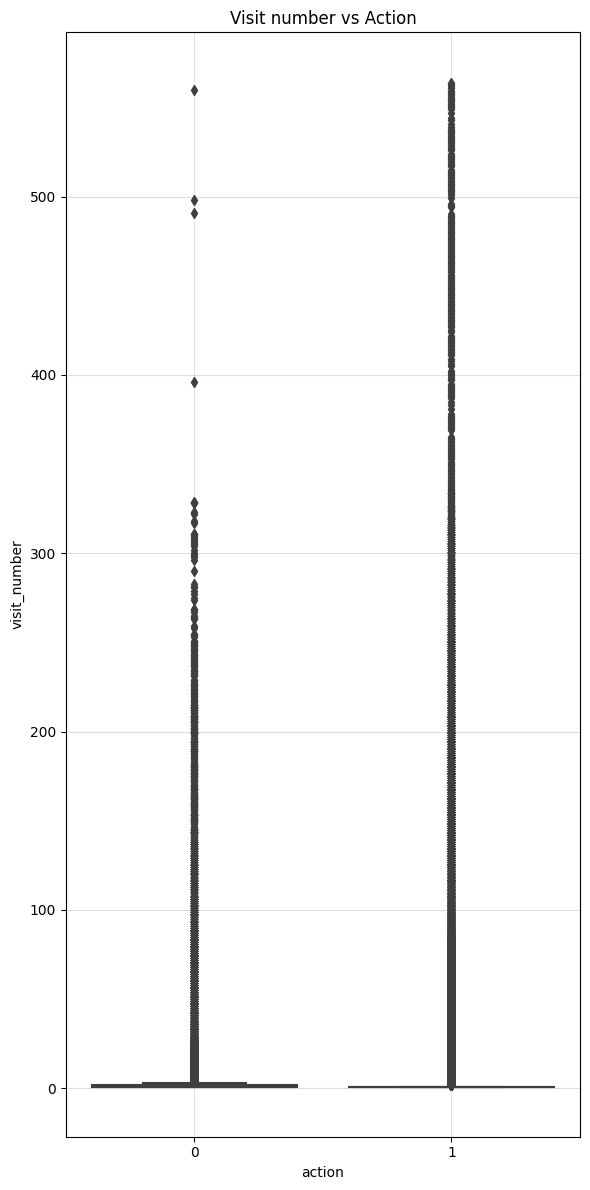

In [34]:
print(f'Среднее значение - {data_sessions["visit_number"].mean()}')
print(f'Медиана - {data_sessions["visit_number"].median()}')
print(f'Максимум - {data_sessions["visit_number"].max()}')

plt.figure(figsize=(6, 12))
sns.boxplot(x='action', y='visit_number', data=data_sessions)
plt.title("Visit number vs Action")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

#### Данные сильно разнятся, проведем их групировку, вначале выясним самые частые значения, а остальные сгрупируем в категорию right+)

In [35]:
print(data_sessions["visit_number"].quantile(0.25))
print(data_sessions["visit_number"].quantile(0.75))
iqr = (data_sessions["visit_number"].quantile(0.75) - data_sessions["visit_number"].quantile(0.25))
left = data_sessions["visit_number"].quantile(0.25) - 1.5 * iqr
right = data_sessions["visit_number"].quantile(0.75) + 1.5 * iqr
right = round(right)
data_sessions["visit_number"] = data_sessions["visit_number"].astype('object').apply(lambda x: x if int(x) <= right else f"{right}+")

1.0
2.0


In [36]:
right

4

#### Проведем анализ данных, поищем зависимости и построим инофрмативные графики

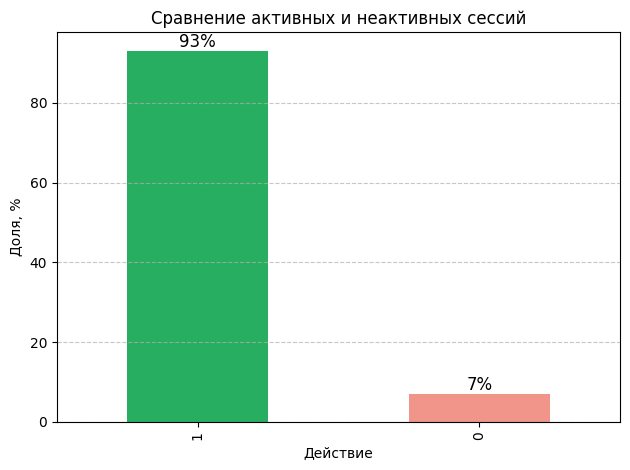

In [37]:
data = (data_sessions['action'].value_counts()/len(data_sessions['action']) * 100).round()
colors = ["#27AE60", "#F1948A"]


ax = data.plot.bar(color=colors)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlabel("Действие")
ax.set_ylabel("Доля, %")
ax.set_title("Сравнение активных и неактивных сессий")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}%', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=12)


plt.tight_layout()
plt.show()

#### Построим соотношение наших признаков и целевого признака. Напишем фукцию захватывающую 90 % процентов значений, остальные 10% объеденим в категорию others

In [38]:
def reduce_categories_by_coverage(series, coverage=0.9):
    counts = series.value_counts(normalize=True).cumsum()
    main_categories = counts[counts <= coverage].index
    return series.where(series.isin(main_categories), other='other')

In [39]:
for col in ['utm_source', 'utm_campaign', 'utm_campaign', 'utm_adcontent', 'device_brand', 'device_screen_resolution', 'device_browser', 'geo_city']:
    data_sessions[col] = reduce_categories_by_coverage(data_sessions[col])
    # print(data_sessions[col].value_counts())

action,0,1
visit_date,,
autumn,3.54,41.46
spring,0.19,5.62
summer,1.37,26.36
winter,1.77,19.69


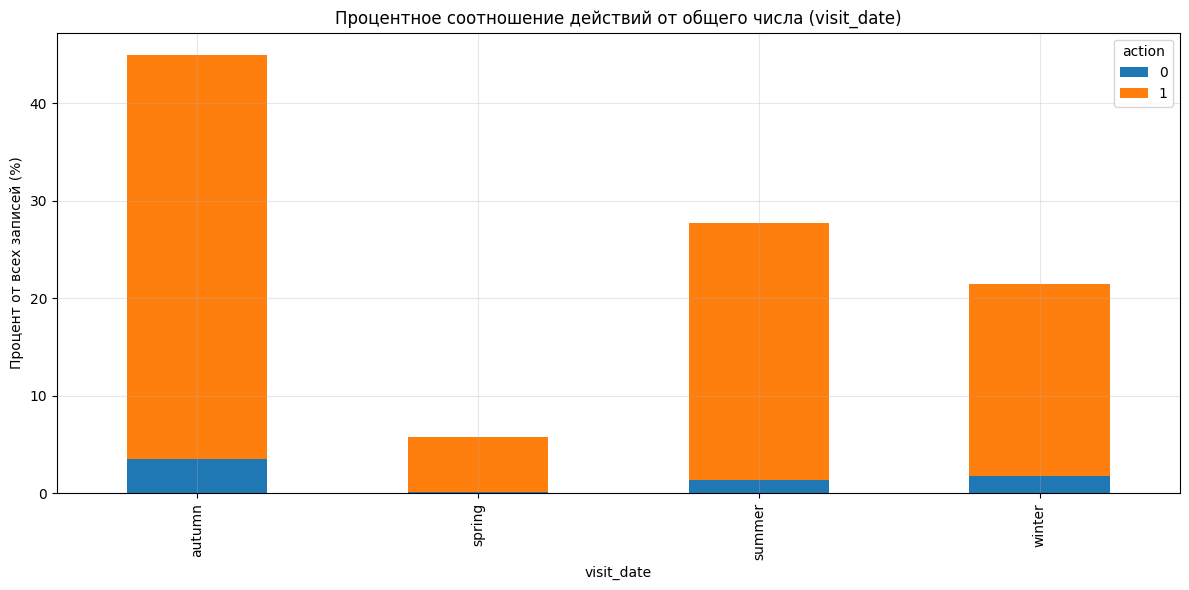

action,0,1
visit_time,,
day,2.25,31.41
evening,2.18,28.80
morning,1.77,22.82
night,0.67,10.09


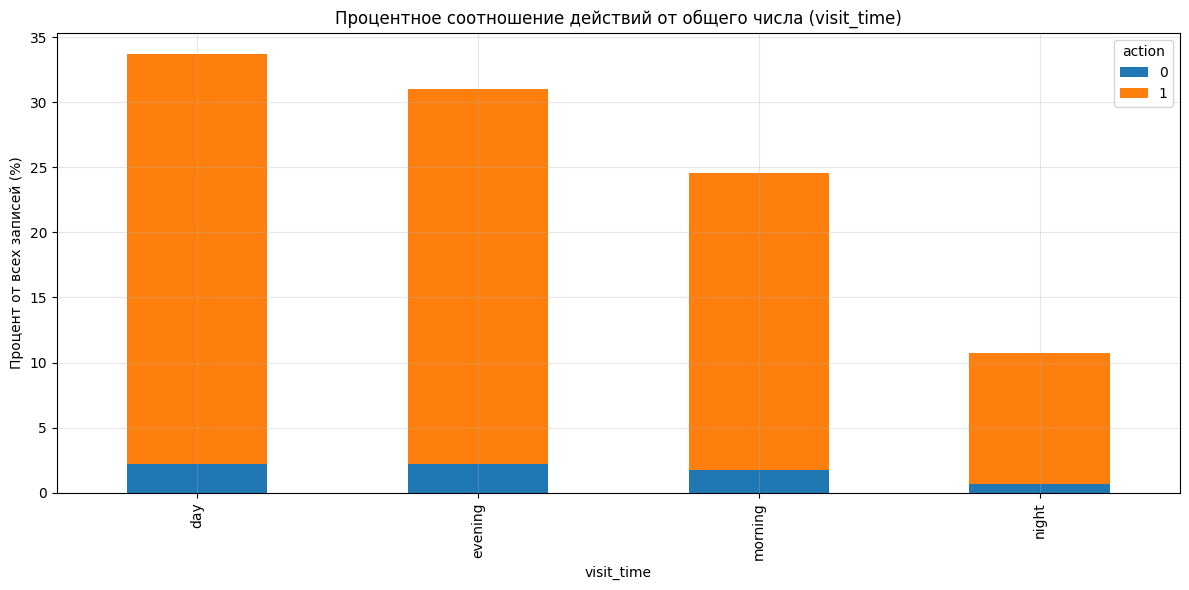

action,0,1
visit_number,,
1,4.05,69.95
2,1.26,11.41
3,0.50,3.86
4,0.27,1.97
4+,0.79,5.94


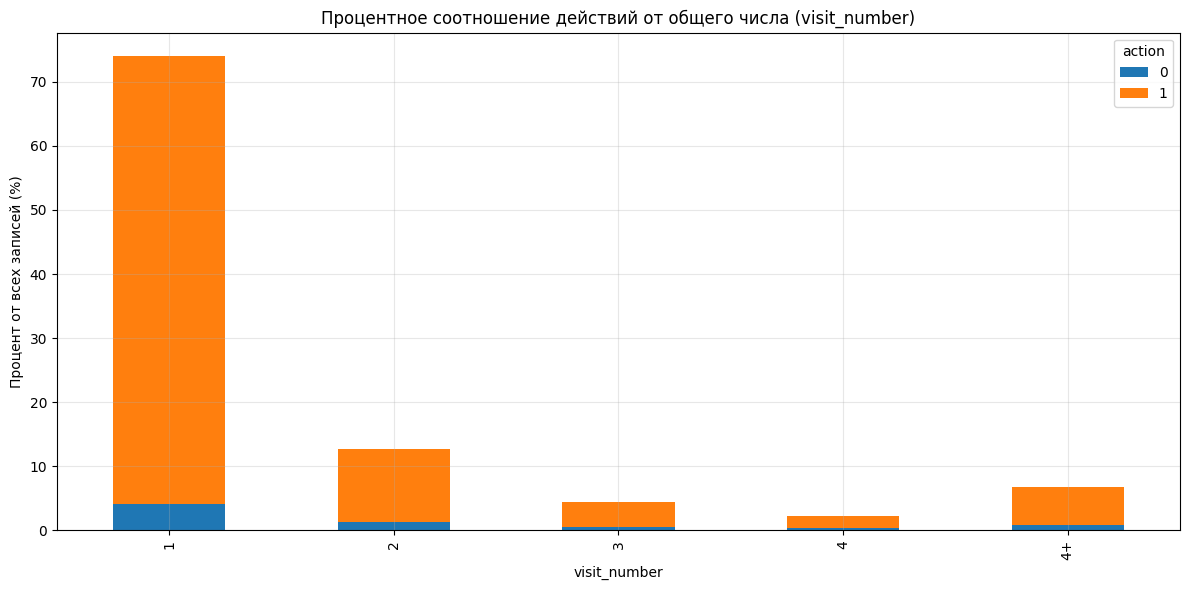

action,0,1
utm_medium,,
(none),1.26,14.90
(not set),0.00,0.02
CPM,0.00,0.00
Sbol_catalog,0.00,0.00
app,0.09,0.07
article,0.00,0.00
banner,1.46,28.24
blogger_channel,0.02,0.42
blogger_header,0.00,0.04


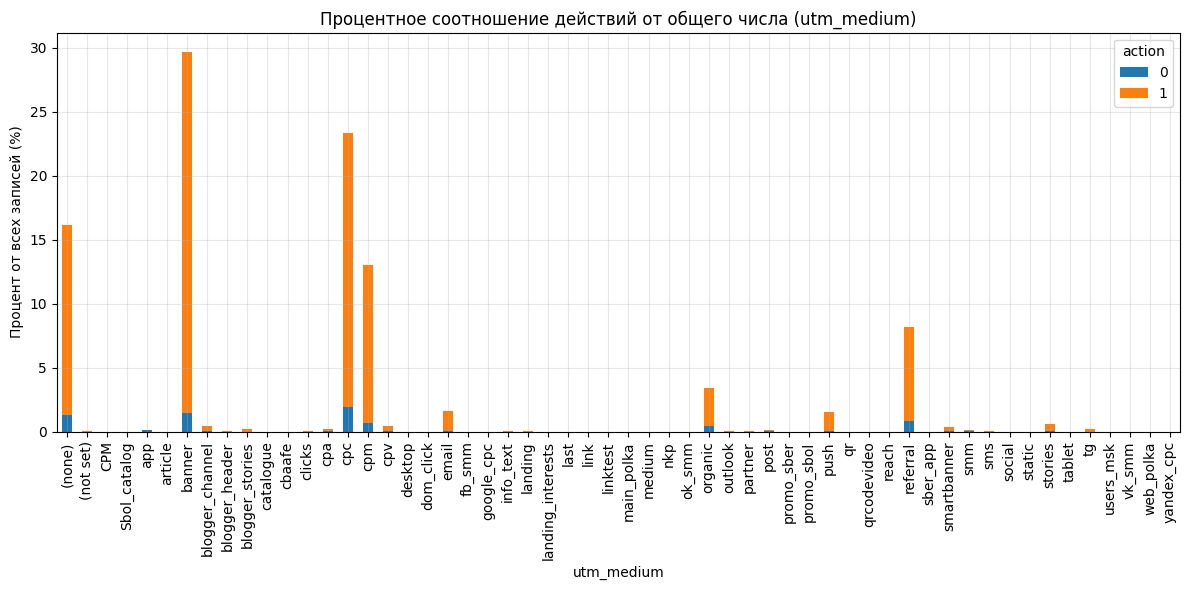

action,0,1
device_category,,
desktop,1.07,18.65
mobile,5.71,73.58
tablet,0.09,0.90


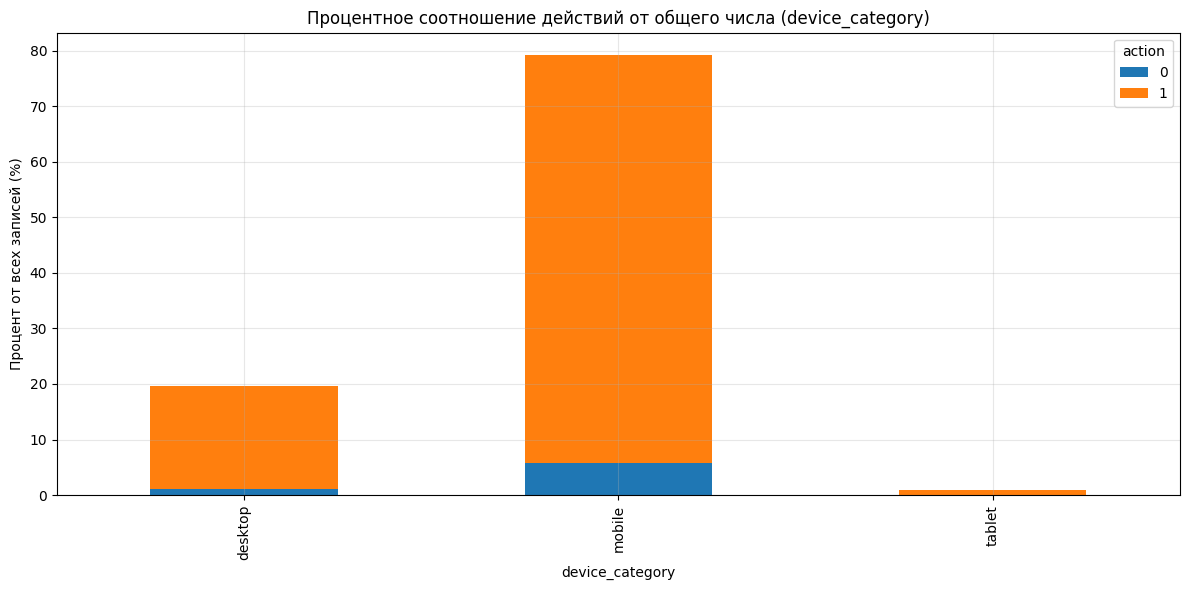

action,0,1
utm_source,,
BHcvLfOaCWvWTykYqHVe,0.29,5.97
MvfHsxITijuriZxsqZqt,0.56,9.45
QxAxdyPLuQMEcrdZWdWb,0.33,2.43
ZpYIoDJMcFzVoPFsHGJL,1.38,29.71
aXQzDWsJuGXeBXexNHjc,0.09,1.59
bByPQxmDaMXgpHeypKSM,0.64,4.86
fDLlAcSmythWSCVMvqvL,1.26,14.90
jaSOmLICuBzCFqHfBdRg,0.05,1.52
kjsLglQLzykiRbcDiGcD,1.14,13.18


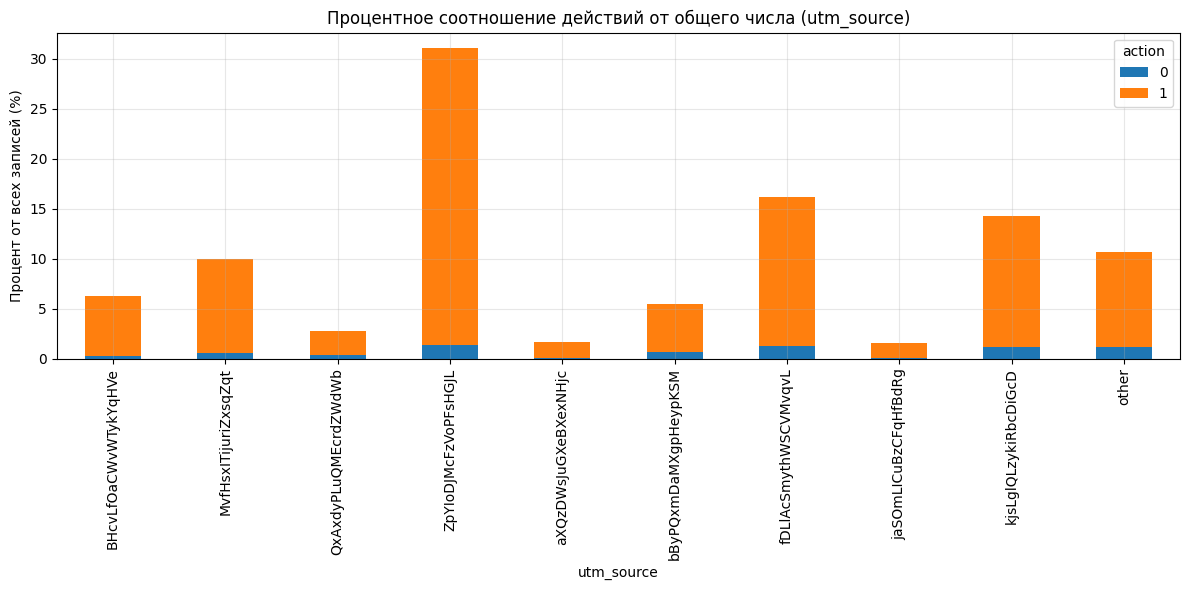

action,0,1
utm_campaign,,
FTjNLDyTrXaWYgZymFkV,0.67,12.63
LEoPHuyFvzoNfnzGgfcd,0.15,17.27
LTuZkdKfxRGVceoWkVyg,2.18,22.74
TmThBvoCcwkCZZUWACYq,0.63,0.80
XHNUiSKKGTEpSAlaVMFQ,0.04,1.28
gecBYcKZCPMcVYdSSzKP,0.04,7.16
n/a,1.31,10.50
okTXSMadDkjvntEHzIjp,0.33,0.99
other,1.53,19.76


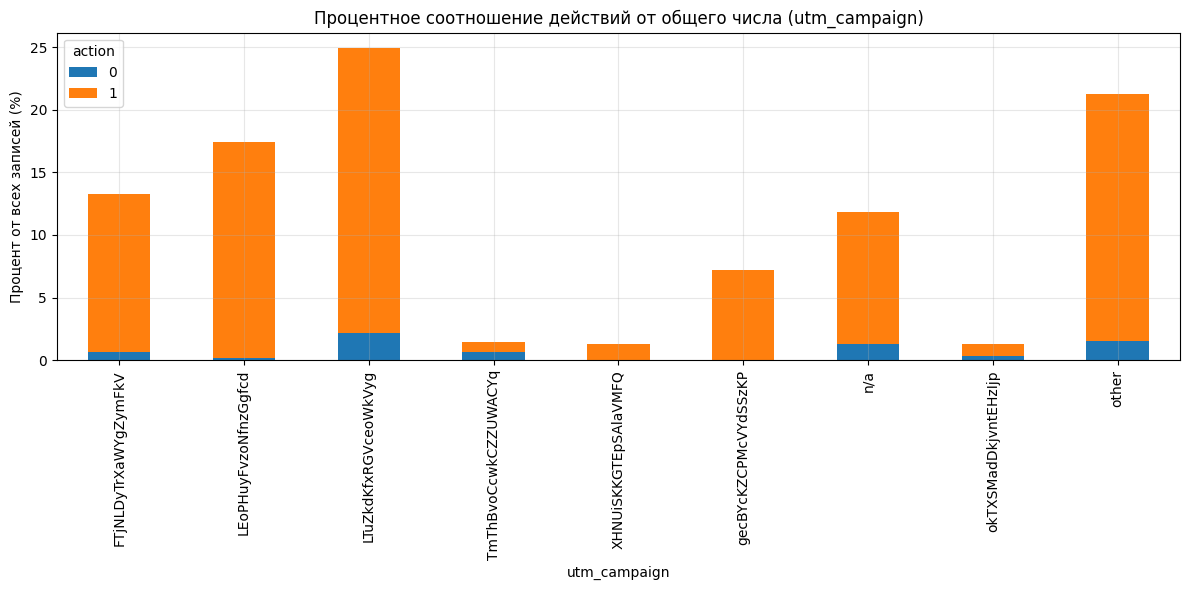

action,0,1
utm_adcontent,,
JNHcPlZPxEMWDnRiyoBf,3.83,50.29
n/a,1.69,16.35
other,0.80,11.23
vCIpmpaGBnIQhyYNkXqp,0.09,9.65
xhoenQgDQsgfEPYNPwKO,0.47,5.61


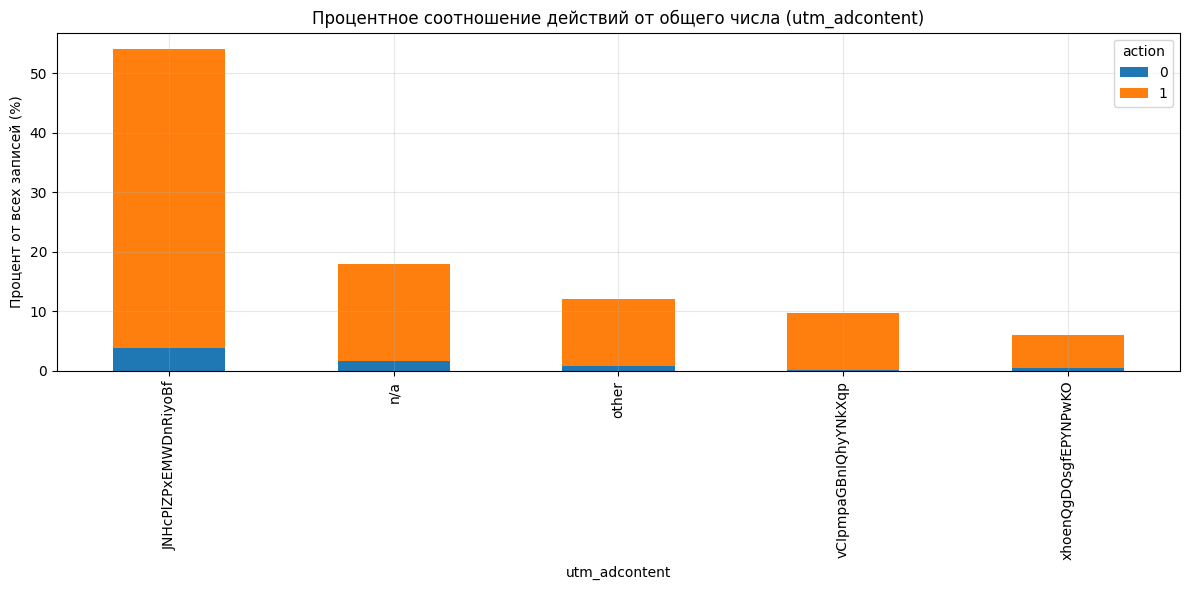

action,0,1
device_brand,,
Apple,2.56,27.07
Samsung,1.10,16.75
Xiaomi,1.03,14.48
n/a,1.07,18.67
other,1.11,16.16


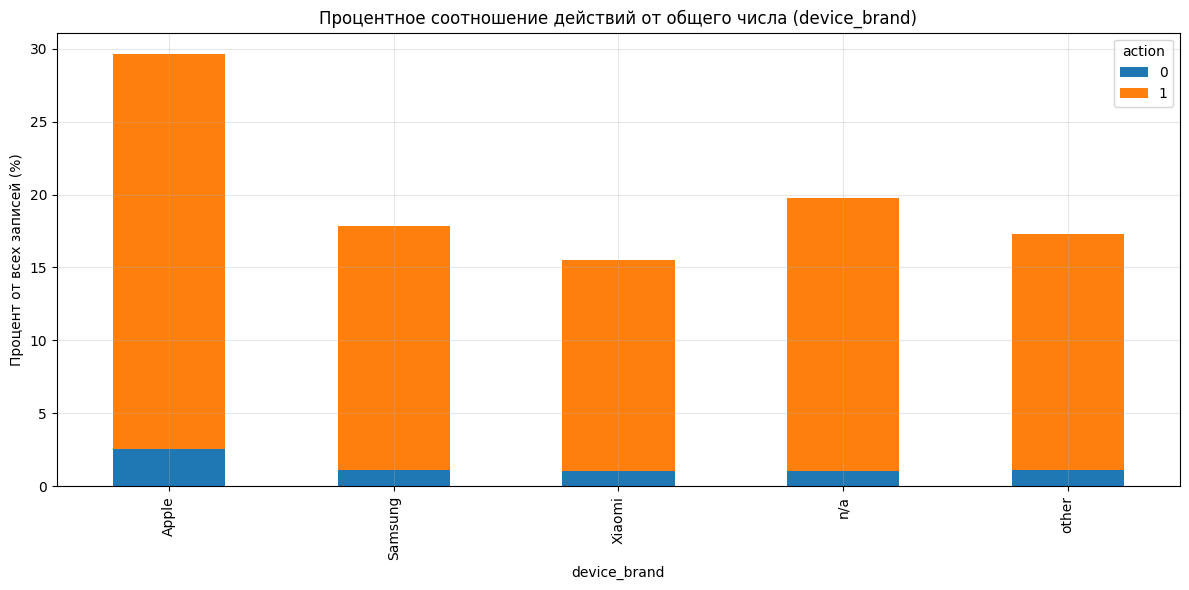

action,0,1
device_screen_resolution,,
1280x1024,0.03,0.41
1280x720,0.05,1.04
1280x800,0.02,0.37
1366x768,0.12,1.71
1440x900,0.07,1.60
1536x864,0.10,1.91
1600x900,0.03,0.66
1680x1050,0.03,0.58
1792x1120,0.02,0.40


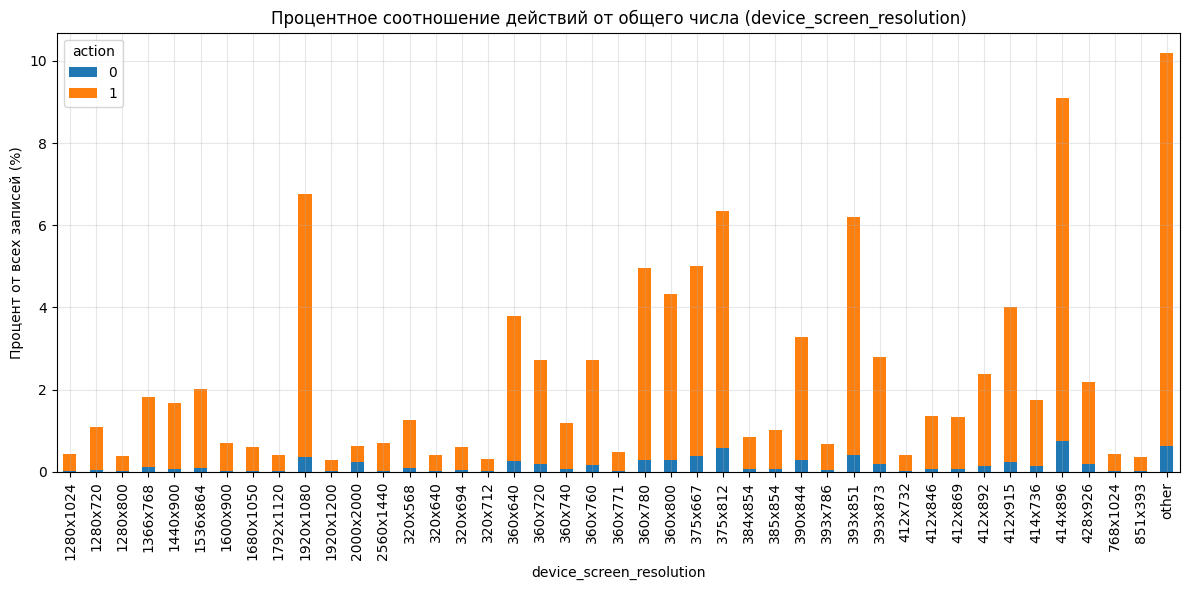

action,0,1
device_browser,,
Chrome,3.33,51.16
Safari,2.25,23.48
YaBrowser,0.51,6.65
other,0.78,11.84


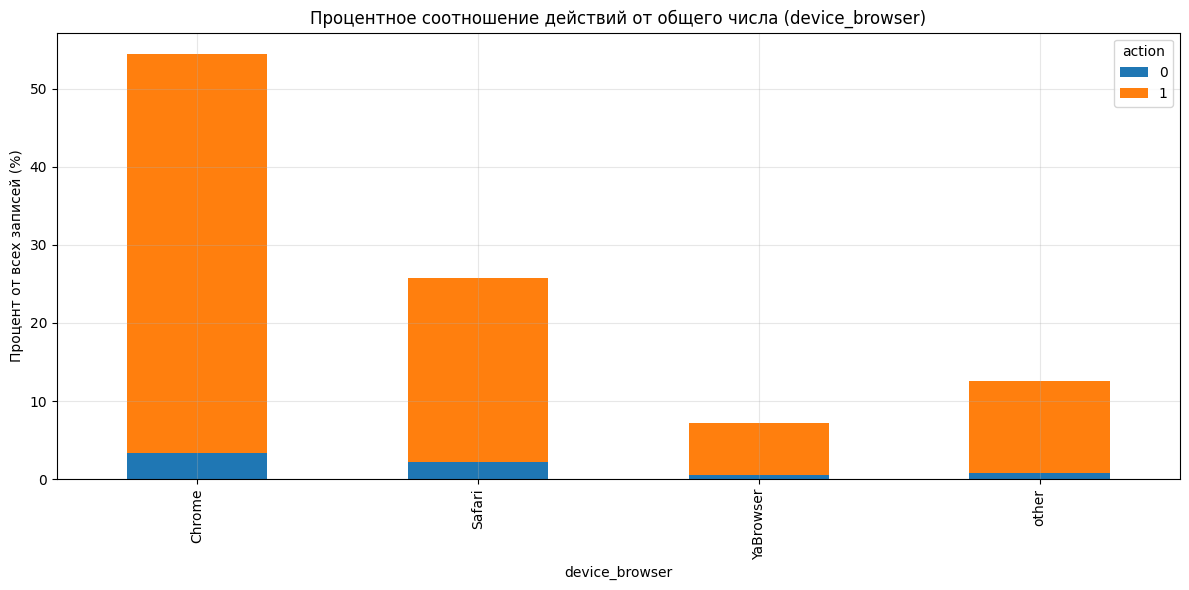

action,0,1
geo_city,,
(not set),0.26,3.94
Balashikha,0.04,0.64
Barnaul,0.01,0.15
Belgorod,0.01,0.13
Cheboksary,0.01,0.12
...,...,...
Voronezh,0.06,0.68
Yaroslavl,0.04,0.49
Yekaterinburg,0.12,1.80


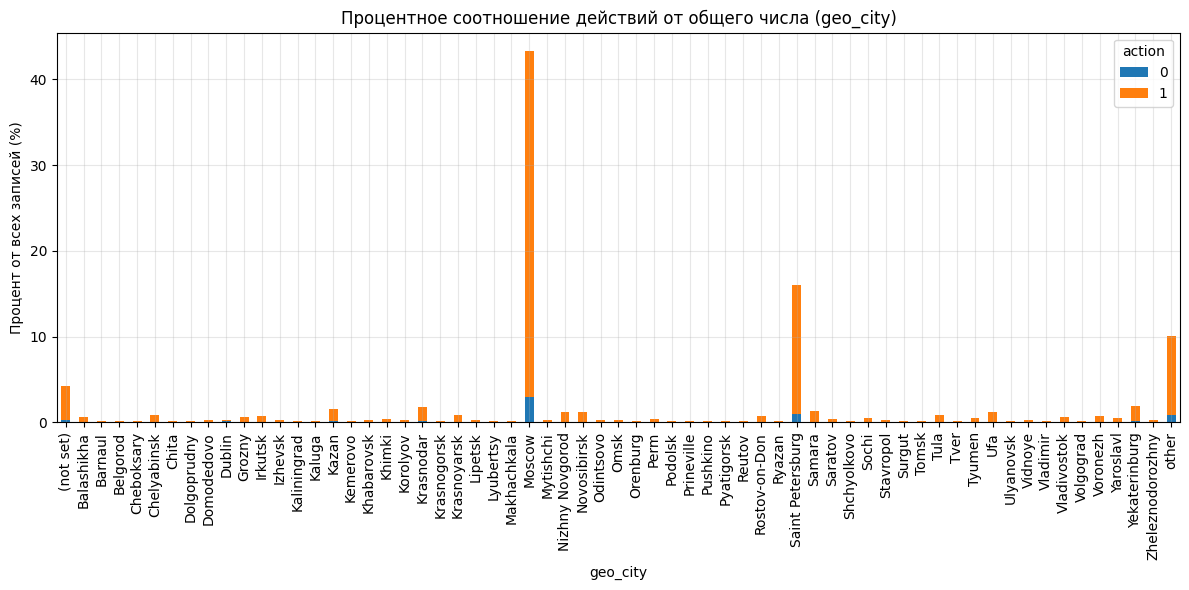

In [40]:
cat_cols = ['visit_date', 'visit_time','visit_number', 'utm_medium', 'device_category', 'utm_source', 'utm_campaign', 'utm_adcontent', 'device_brand', 'device_screen_resolution', 'device_browser', 'geo_city']
for col in cat_cols:
    pivot = (pd.crosstab(data_sessions[col], data_sessions['action'], normalize='all') * 100).round(2)
    display(pivot)
    pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f"Процентное соотношение действий от общего числа ({col})")
    plt.ylabel("Процент от всех записей (%)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


 ####  На последок проведем корреляционный анализ, но так как большая часть признаков категориальная, то воспользуемся V-мерой Крамера

In [41]:
%pip install association-metrics -q

  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [42]:
"""import association_metrics as am

data_sessions_cat = data_sessions.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(data_sessions_cat)

cramersv.fit()"""

'import association_metrics as am\n\ndata_sessions_cat = data_sessions.apply(lambda x: x.astype("category") if x.dtype == "object" else x)\n\ncramersv = am.CramersV(data_sessions_cat)\n\ncramersv.fit()'

## ИТОГ
- Был проведен первичный анализ датасета, обработаны пропуски и дубликаты, представлена визуализация и удалены неинформативные признаки.
- При создании модели рекомендую поиграться с функцией reduce_categories_by_coverage для уменьшения сложности и снижения переобучения модели.
- Анализ на кореляцию показал наличее зависимостей, что не скажется на ансамблевых моделях, но линейные модели(регрессия и нейросети) могут показывать плохие результаты 

In [43]:
data_sessions.to_csv('data_sessions.csv', index=False)

#  **CatBoost**

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, f1_score
from catboost import CatBoostClassifier

In [45]:
data_sessions

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,autumn,day,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,other,360x720,Chrome,Russia,other,1
1,905544597018549464.1636867290.1636867290,210838531.163687,autumn,morning,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,other,Russia,Moscow,1
2,9055446045651783499.1640648526.1640648526,2108385331.164065,winter,night,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,other,360x720,Chrome,Russia,Krasnoyarsk,1
3,9055447046360770272.1622255328.1622255328,2108385564.162225,spring,night,1,kjsLglQLzykiRbcDiGcD,cpc,n/a,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,1
4,9055447046360770272.1622255345.1622255345,2108385564.162225,spring,night,2,kjsLglQLzykiRbcDiGcD,cpc,n/a,n/a,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,winter,morning,1,BHcvLfOaCWvWTykYqHVe,cpc,n/a,n/a,desktop,n/a,1920x1080,Chrome,Russia,Moscow,1
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,spring,morning,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol,1
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,autumn,day,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow,1
1860040,905543020766873816.1638189404.1638189404,210838164.163819,autumn,day,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,1


Взял доп обработки у Алексея

In [46]:
data_cb = data_sessions.drop(['session_id', 'client_id'], axis = 1)

In [47]:
def to_int(x):
    if x == '4+':
        return 5
    else:
        return int(x)

data_cb['visit_number'] = data_cb['visit_number'].apply(to_int)
X_train, X_test, y_train, y_test = train_test_split(data_cb.drop(columns='action'), data_cb['action'], test_size=0.3, random_state=42)
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1302029, 13)

(1302029,)

(558013, 13)

(558013,)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302029 entries, 1828673 to 121958
Data columns (total 13 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   visit_date                1302029 non-null  object
 1   visit_time                1302029 non-null  object
 2   visit_number              1302029 non-null  int64 
 3   utm_source                1302029 non-null  object
 4   utm_medium                1302029 non-null  object
 5   utm_campaign              1302029 non-null  object
 6   utm_adcontent             1302029 non-null  object
 7   device_category           1302029 non-null  object
 8   device_brand              1302029 non-null  object
 9   device_screen_resolution  1302029 non-null  object
 10  device_browser            1302029 non-null  object
 11  geo_country               1302029 non-null  object
 12  geo_city                  1302029 non-null  object
dtypes: int64(1), object(12)
memory usage: 139.

In [ ]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
model = CatBoostClassifier(task_type="GPU",       
    devices='0',           
    verbose=100)
model.fit(X_train, y_train, cat_features=cat_features) # Тестовый вариант

Learning rate set to 0.022723
0:	learn: 0.6611587	total: 1.99s	remaining: 33m 6s
100:	learn: 0.2014588	total: 13.3s	remaining: 1m 58s
200:	learn: 0.1931170	total: 23.5s	remaining: 1m 33s
300:	learn: 0.1911272	total: 33.9s	remaining: 1m 18s
400:	learn: 0.1898656	total: 44.3s	remaining: 1m 6s
500:	learn: 0.1890583	total: 54.5s	remaining: 54.3s
600:	learn: 0.1885307	total: 1m 4s	remaining: 43s
700:	learn: 0.1881373	total: 1m 14s	remaining: 31.9s
800:	learn: 0.1878423	total: 1m 24s	remaining: 21.1s
900:	learn: 0.1875901	total: 1m 35s	remaining: 10.5s
999:	learn: 0.1873306	total: 1m 45s	remaining: 0us


In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [52]:
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_proba)

print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {roc:.3f}")

F1-score: 0.965
ROC AUC: 0.859


In [ ]:
param_grid = {
    'depth':         [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations':    [100, 300, 500],
    'l2_leaf_reg':   [1, 3, 5]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=1
)

In [54]:
grid.fit(
    X_train, y_train,
    cat_features=cat_features
)

0:	learn: 0.6857171	total: 8.57ms	remaining: 848ms
99:	learn: 0.3358889	total: 734ms	remaining: 0us
0:	learn: 0.6857174	total: 8.18ms	remaining: 810ms
99:	learn: 0.3354426	total: 756ms	remaining: 0us
0:	learn: 0.6857172	total: 8.02ms	remaining: 794ms
99:	learn: 0.3353829	total: 742ms	remaining: 0us
0:	learn: 0.6857177	total: 8.04ms	remaining: 796ms
99:	learn: 0.3357806	total: 742ms	remaining: 0us
0:	learn: 0.6857174	total: 8.44ms	remaining: 836ms
99:	learn: 0.3354924	total: 757ms	remaining: 0us
0:	learn: 0.6567448	total: 8.79ms	remaining: 870ms
99:	learn: 0.2107188	total: 775ms	remaining: 0us
0:	learn: 0.6567452	total: 8.01ms	remaining: 793ms
99:	learn: 0.2096959	total: 760ms	remaining: 0us
0:	learn: 0.6567448	total: 7.95ms	remaining: 787ms
99:	learn: 0.2095655	total: 752ms	remaining: 0us
0:	learn: 0.6567454	total: 8.33ms	remaining: 825ms
99:	learn: 0.2091540	total: 758ms	remaining: 0us
0:	learn: 0.6567448	total: 8.18ms	remaining: 810ms
99:	learn: 0.2098930	total: 750ms	remaining: 0us


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7b2094424e50>,
             n_jobs=1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 300, 500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='roc_auc')

In [55]:
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)
y_pred_proba_grid = best_model.predict_proba(X_test)[:, 1]

In [56]:
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_proba_grid))
print("Test F1-score:", f1_score(y_test, y_pred_grid))

Test ROC AUC: 0.8624786331253054
Test F1-score: 0.9655352582733014


In [ ]:
best_model.save_model('cat_boost.cbm')
best_model.save_model('cat_boost.json', format='json')

In [58]:
print(grid.best_params_)

{'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
